In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def revenue(x):
    return 0.5 * x**2 - 30*x + 100

In [4]:
# derivative to understand direction of ascent or descnt
def derivative(x):
    return x -30

In [5]:
# using SGD with momentum as optimzation func
def sgdm(x, lr, m, iterations):
    history=[x]
    velocity=0
    
    for i in range(iterations):
        gradient=derivative(x)
        velocity = m*velocity - lr*gradient
        x+=velocity
        history.append(x)
    return x, history

In [26]:
# initializing values
initial_price =700
lr =0.5
m= 0.5
iterations =20

In [27]:
# optimization
optimal_price, price_history = sgdm(initial_price, lr, m, iterations)

In [28]:
# Print results
print("Optimal Price:", optimal_price)
print("Revenue at Optimal Price:", revenue(optimal_price))
print("Price History:", price_history)

Optimal Price: 29.345703125
Revenue at Optimal Price: -349.7859477996826
Price History: [700, 365.0, 30.0, -137.5, -137.5, -53.75, 30.0, 71.875, 71.875, 50.9375, 30.0, 19.53125, 19.53125, 24.765625, 30.0, 32.6171875, 32.6171875, 31.30859375, 30.0, 29.345703125, 29.345703125]


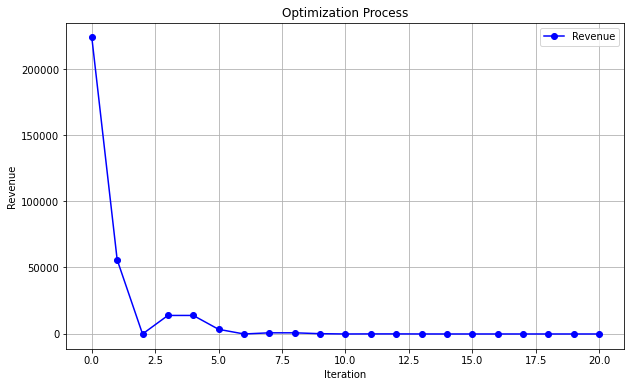

In [29]:
# Plot optimization process
plt.figure(figsize=(10, 6))
iteration = np.arange(iterations + 1)
plt.plot(iteration, [revenue(x) for x in price_history], marker='o', color='b', label='Revenue')
plt.xlabel('Iteration')
plt.ylabel('Revenue')
plt.title('Optimization Process')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [31]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [33]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [34]:
df.drop('id', axis=1, inplace=True)

In [42]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [39]:
# handling missing values in bmi
mean_bmi = df['bmi'].mean()
mean_bmi

28.89323691179472

In [40]:
df['bmi'].fillna(mean_bmi, inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [44]:
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [45]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


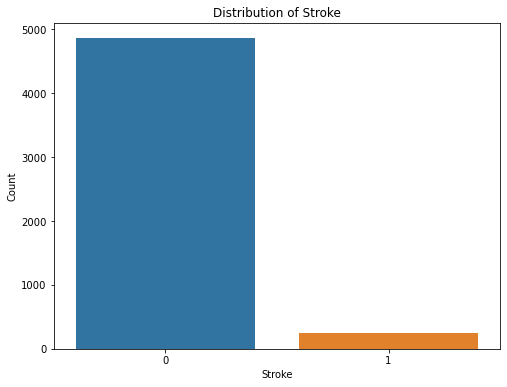

In [47]:
#distribution of the target variable 'stroke'
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

In [49]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [50]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [52]:
# Applying SMOTE to target
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [53]:
pd.Series(y_resampled).value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

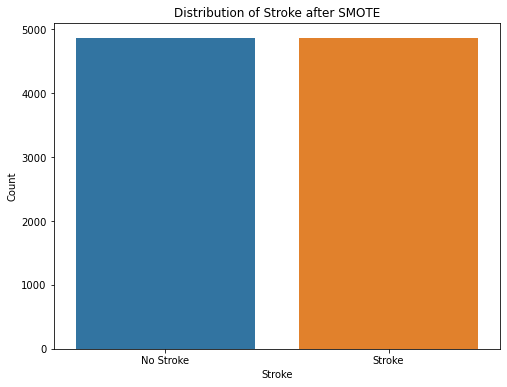

In [54]:
resampled_stroke = pd.Series(y_resampled)

# distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=resampled_stroke)
plt.title('Distribution of Stroke after SMOTE')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'])
plt.show()

In [57]:
# split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [78]:
# MLP with L1 and L2
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [79]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # You can adjust the learning rate as needed
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',# coz binary classification
              metrics=['accuracy'])

In [80]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [81]:
# Training
history = model.fit(X_train, y_train, epochs=52, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/52
195/195 [==============================] - 1s 2ms/step - loss: 1.2427 - accuracy: 0.7139 - val_loss: 0.9174 - val_accuracy: 0.7230
Epoch 2/52
195/195 [==============================] - 0s 2ms/step - loss: 0.9096 - accuracy: 0.7312 - val_loss: 0.9023 - val_accuracy: 0.7500
Epoch 3/52
195/195 [==============================] - 0s 1ms/step - loss: 0.8915 - accuracy: 0.7444 - val_loss: 0.8532 - val_accuracy: 0.7590
Epoch 4/52
195/195 [==============================] - 0s 2ms/step - loss: 0.8820 - accuracy: 0.7446 - val_loss: 0.8560 - val_accuracy: 0.7629
Epoch 5/52
195/195 [==============================] - 0s 1ms/step - loss: 0.8703 - accuracy: 0.7507 - val_loss: 0.8569 - val_accuracy: 0.7532
Epoch 6/52
195/195 [==============================] - 0s 2ms/step - loss: 0.8691 - accuracy: 0.7486 - val_loss: 0.8349 - val_accuracy: 0.7699
Epoch 7/52
195/195 [==============================] - 0s 2ms/step - loss: 0.8534 - accuracy: 0.7533 - val_loss: 0.8292 - val_accuracy: 0.7622
Epoch 

In [82]:
# Display the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               2816      
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 19,457
Trainable params: 19,457
Non-trainable params: 0
_________________________________________________________________


In [83]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

61/61 [==============================] - 0s 1ms/step


In [84]:
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7002570694087403
Precision: 0.6260586319218241
Recall: 0.9907216494845361
F1-score: 0.7672654690618761


In [85]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[401 574]
 [  9 961]]


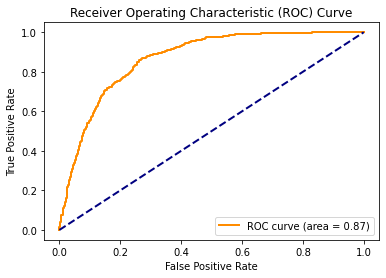

In [86]:
#ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

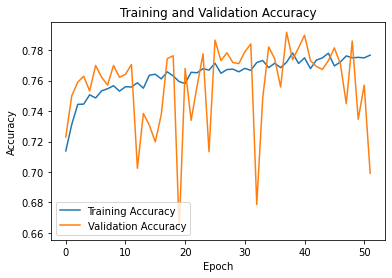

In [87]:
# Learning curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [90]:
# Elastic net regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [91]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [97]:
history1 = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
195/195 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.7733 - val_loss: 0.6194 - val_accuracy: 0.7853
Epoch 2/50
195/195 [==============================] - 0s 2ms/step - loss: 0.6383 - accuracy: 0.7697 - val_loss: 0.6044 - val_accuracy: 0.8008
Epoch 3/50
195/195 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.7708 - val_loss: 0.5982 - val_accuracy: 0.7853
Epoch 4/50
195/195 [==============================] - 0s 2ms/step - loss: 0.6121 - accuracy: 0.7695 - val_loss: 0.5827 - val_accuracy: 0.7892
Epoch 5/50
195/195 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.7758 - val_loss: 0.5894 - val_accuracy: 0.7796
Epoch 6/50
195/195 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.7721 - val_loss: 0.6188 - val_accuracy: 0.7551
Epoch 7/50
195/195 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.7725 - val_loss: 0.5893 - val_accuracy: 0.7725
Epoch 

In [98]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

61/61 [==============================] - 0s 984us/step


In [99]:
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7892030848329049
Precision: 0.7578268876611418
Recall: 0.8484536082474227
F1-score: 0.8005836575875487


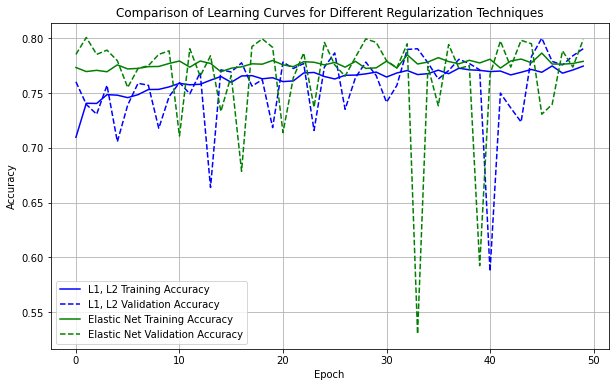

In [101]:
plt.figure(figsize=(10, 6))

# Model with L1 regularization
plt.plot(history.history['accuracy'], label='L1, L2 Training Accuracy', linestyle='-', color='blue')
plt.plot(history.history['val_accuracy'], label='L1, L2 Validation Accuracy', linestyle='--', color='blue')

# Model with Elastic Net regularization
plt.plot(history1.history['accuracy'], label='Elastic Net Training Accuracy', linestyle='-', color='green')
plt.plot(history1.history['val_accuracy'], label='Elastic Net Validation Accuracy', linestyle='--', color='green')

plt.title('Comparison of Learning Curves for Different Regularization Techniques')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()